In [238]:
import os
import pandas as pd
import numpy as np


In [239]:
df = pd.read_csv(os.path.join("data", "db", "Observations.csv"))
df.head()

,Player Id,Salary Year,Annual Salary,Contract Years,Salary Team,Advanced Pitching_BABIP.Year-1,Advanced Pitching_BB/9.Year-1,Advanced Pitching_BQR.Year-1,Advanced Pitching_BQR_S.Year-1,Advanced Pitching_H/9.Year-1,...,Pitching_SV.Year-1,Pitching_SVO.Year-1,Pitching_W.Year-1,Pitching_WHIP.Year-1,Player Id.1,Team 1.Year-1,Team 2.Year-1,Team 3.Year-1,Team 4.Year-1,Team 5.Year-1
0,jbverlander,2015,"$ 25,714,285",7 (2013-19),DET,0.320,2.84,14.0,9.0,9.74,...,0.0,0.0,15.0,1.40,jbverlander,DET,NaN,NaN,NaN,NaN
1,dzgreinke,2015,"$ 24,500,000",6 (2013-18),LAD,0.312,1.91,3.0,0.0,8.45,...,0.0,0.0,17.0,1.15,dzgreinke,LAD,NaN,NaN,NaN,NaN
2,jhhamilton,2015,"$ 25,000,000",5 (2013-17),LAA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,jhhamilton,LAA,NaN,NaN,NaN,NaN
3,rjhoward,2015,"$ 25,000,000",5 (2012-16),PHI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,rjhoward,PHI,NaN,NaN,NaN,NaN
4,aerodriguez,2012,"$ 27,500,000",10 (2008-17),NYY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,aerodriguez,NYY,NaN,NaN,NaN,NaN


In [240]:
df.describe()

C:\Users\Owner\Anaconda3\envs\data_analysis\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Salary Year,Advanced Pitching_BABIP.Year-1,Advanced Pitching_BB/9.Year-1,Advanced Pitching_BQR.Year-1,Advanced Pitching_BQR_S.Year-1,Advanced Pitching_H/9.Year-1,Advanced Pitching_HR/9.Year-1,Advanced Pitching_IR.Year-1,Advanced Pitching_IR_S.Year-1,Advanced Pitching_K/9.Year-1,...,Pitching_IP.Year-1,Pitching_L.Year-1,Pitching_R.Year-1,Pitching_SHO.Year-1,Pitching_SO.Year-1,Pitching_SV.Year-1,Pitching_SVO.Year-1,Pitching_W.Year-1,Pitching_WHIP.Year-1,Team 5.Year-1
count,3936.000000,1830.000000,1829.000000,1832.000000,1832.000000,1829.000000,1829.000000,1832.000000,1832.000000,1829.000000,...,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1829.000000,0.0
mean,2013.014990,0.336740,3.711443,12.982533,3.995633,9.755621,1.030995,13.174127,3.722162,8.976244,...,98.653166,5.384279,44.310044,0.173581,83.436681,3.088428,4.343341,5.825873,1.496473,NaN
std,1.428705,0.176717,2.531941,9.666064,3.647341,5.665945,0.969666,17.770388,5.329533,4.845809,...,78.091016,4.900733,38.074777,0.543469,66.115710,9.315857,10.620998,5.398558,0.825603,NaN
min,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2015.000000,1.413000,27.000000,84.000000,32.000000,55.800000,18.000000,132.000000,44.000000,44.840000,...,495.500000,34.000000,240.000000,6.000000,542.000000,84.000000,96.000000,32.000000,7.140000,NaN


## Cleaning and Feature Selection

### Cleanup salaries

In [241]:
df['Annual Salary'] = df['Annual Salary'].str.replace("$", "")
df['Annual Salary'] = df['Annual Salary'].str.replace(",", "")
df['Annual Salary'] = pd.to_numeric(df['Annual Salary'])

### Adjust salaries

In [242]:
#df.head()

# Average Player Salary by year
df_gb_year = df.groupby('Salary Year')
counts = df_gb_year.count()
average_player_salaries = df_gb_year.sum()['Annual Salary'] / df_gb_year.count()['Annual Salary']
avg_player_salaries_df = average_player_salaries.reset_index()
avg_player_salaries_df.columns = ['Salary Year', 'Average Annual Player Salary']
df = pd.merge(df, avg_player_salaries_df, on='Salary Year')

# Adjust salaries by the average annual salary in that year, to adjust for inflation
df['Adjusted Salary'] = df['Annual Salary'] / df['Average Annual Player Salary']

# This could be useful:
df['Log Adjusted Salary'] = np.log(df['Adjusted Salary'])

### Bring in payroll data

In [243]:
team_payrolls_df = pd.read_csv(os.path.join("data", "db", "TeamPayrolls.csv"))
team_payrolls_df = team_payrolls_df.drop('Team', 1)
team_payrolls_df = team_payrolls_df.rename(index=str, columns={'Team (Abbreviated)' : 'Team'})
grouped_team_payrolls = team_payrolls_df.groupby('Year')
avg_annual_payrolls = grouped_team_payrolls.mean()
avg_annual_payrolls = avg_annual_payrolls.reset_index()
avg_annual_payrolls = avg_annual_payrolls.rename(columns={'Payroll' : 'Avg Payroll'}) 
avg_annual_payrolls = pd.DataFrame(avg_annual_payrolls.reset_index(), columns=['Year', 'Avg Payroll'])

team_payrolls_df = pd.merge(team_payrolls_df, avg_annual_payrolls, on=['Year'])
team_payrolls_df['Adjusted Team Payroll'] = team_payrolls_df['Payroll'] / team_payrolls_df['Avg Payroll']
team_payrolls_df.head()

# Rename columns so that we can merge
df = df.rename(index=str, columns={'Salary Team' : 'Team',
                              'Salary Year' : 'Year'})
df = pd.merge(df, team_payrolls_df, on=['Team', 'Year'])
df.head()

,Player Id,Year,Annual Salary,Contract Years,Team,Advanced Pitching_BABIP.Year-1,Advanced Pitching_BB/9.Year-1,Advanced Pitching_BQR.Year-1,Advanced Pitching_BQR_S.Year-1,Advanced Pitching_H/9.Year-1,...,Team 4.Year-1,Team 5.Year-1,Average Annual Player Salary,Adjusted Salary,Log Adjusted Salary,Payroll,Average,Median,Avg Payroll,Adjusted Team Payroll
0,jbverlander,2015,25714285,7 (2013-19),DET,0.320,2.84,14.0,9.0,9.74,...,NaN,NaN,4.571562e+06,5.624835,1.727192,173813750,NaN,NaN,124707037,1.393777
1,jmcabrera,2015,29200000,10 (2014-23),DET,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.571562e+06,6.387313,1.854314,173813750,NaN,NaN,124707037,1.393777
2,dtprice,2015,19750000,1 (2015),DET,0.929,4.33,44.0,14.0,25.15,...,NaN,NaN,4.571562e+06,4.320186,1.463298,173813750,NaN,NaN,124707037,1.393777
3,aasanchez,2015,16000000,5 (2013-17),DET,0.280,2.14,14.0,9.0,7.71,...,NaN,NaN,4.571562e+06,3.499897,1.252734,173813750,NaN,NaN,124707037,1.393777
4,imkinsler,2015,15000000,5 (2013-17),DET,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.571562e+06,3.281154,1.188195,173813750,NaN,NaN,124707037,1.393777


### Derive Pitching Features

In [244]:
# Pitching metrics
# Wins per Inning Pitched. This might be more useful than wins alone.
df['Pitching_Career_WPIP'] = df['Pitching_Career_W'] / df['Pitching_Career_IP'] 

# Starter or reliever? Games Started Per Full Games Played
df['Pitching_Career_GSPFGP']= df['Pitching_Career_GS'] * 9 / df['Pitching_Career_IP']   
df.head()


,Player Id,Year,Annual Salary,Contract Years,Team,Advanced Pitching_BABIP.Year-1,Advanced Pitching_BB/9.Year-1,Advanced Pitching_BQR.Year-1,Advanced Pitching_BQR_S.Year-1,Advanced Pitching_H/9.Year-1,...,Average Annual Player Salary,Adjusted Salary,Log Adjusted Salary,Payroll,Average,Median,Avg Payroll,Adjusted Team Payroll,Pitching_Career_WPIP,Pitching_Career_GSPFGP
0,jbverlander,2015,25714285,7 (2013-19),DET,0.320,2.84,14.0,9.0,9.74,...,4.571562e+06,5.624835,1.727192,173813750,NaN,NaN,124707037,1.393777,0.076900,1.356875
1,jmcabrera,2015,29200000,10 (2014-23),DET,NaN,NaN,NaN,NaN,NaN,...,4.571562e+06,6.387313,1.854314,173813750,NaN,NaN,124707037,1.393777,NaN,NaN
2,dtprice,2015,19750000,1 (2015),DET,0.929,4.33,44.0,14.0,25.15,...,4.571562e+06,4.320186,1.463298,173813750,NaN,NaN,124707037,1.393777,0.068843,1.318928
3,aasanchez,2015,16000000,5 (2013-17),DET,0.280,2.14,14.0,9.0,7.71,...,4.571562e+06,3.499897,1.252734,173813750,NaN,NaN,124707037,1.393777,0.057631,1.477240
4,imkinsler,2015,15000000,5 (2013-17),DET,NaN,NaN,NaN,NaN,NaN,...,4.571562e+06,3.281154,1.188195,173813750,NaN,NaN,124707037,1.393777,NaN,NaN


### Set Position 

In [245]:
# Set position to prior year's
df['Position'] = df['Fielding_POS.1.Year-1']

# Add categorical value for multiple positions
df.loc[df['Num Positions.Year-1'] > 1, ('Position')] = 'MULTIPLE'

### Select relevant columns

In [246]:
# Subset columns
df = pd.DataFrame(df, columns=['Player Id', 'Year', 'Annual Salary', 'Adjusted Salary', 'Log Adjusted Salary',
                               'Adjusted Team Payroll',
                               'Contract Years', 'Position', 
                               'Batting_Career_Num_Seasons', 'Batting_Career_G', 'Batting_Career_AVG', 
                               'Batting_Career_PSN', 'Batting_Career_SB', 'Batting_Career_HR',
                               'Batting_Career_RBI', 
                               'Pitching_Career_Num_Seasons', 'Pitching_Career_G', 'Pitching_Career_ER',
                               'Pitching_Career_ERA', 'Pitching_Career_IP', 'Pitching_Career_SO',
                               'Pitching_Career_SHO', 'Pitching_Career_W', 'Pitching_Career_L',
                               'Pitching_Career_WPIP', 'Pitching_Career_GS', 'Pitching_Career_GSPFGP',
                               'Fielding_Career_Num_Seasons', 'Fielding_Career_G', 'Fielding_Career_FPCT', 
                               'Fielding_Career_A', 'Fielding_Career_PO', 'Fielding_Career_E'])
df.head()

,Player Id,Year,Annual Salary,Adjusted Salary,Log Adjusted Salary,Adjusted Team Payroll,Contract Years,Position,Batting_Career_Num_Seasons,Batting_Career_G,...,Pitching_Career_L,Pitching_Career_WPIP,Pitching_Career_GS,Pitching_Career_GSPFGP,Fielding_Career_Num_Seasons,Fielding_Career_G,Fielding_Career_FPCT,Fielding_Career_A,Fielding_Career_PO,Fielding_Career_E
0,jbverlander,2015,25714285,5.624835,1.727192,1.393777,7 (2013-19),P,9,17.0,...,89.0,0.076900,298.0,1.356875,10,298.0,0.926431,218.0,122.0,27.0
1,jmcabrera,2015,29200000,6.387313,1.854314,1.393777,10 (2014-23),MULTIPLE,12,1819.0,...,0.0,NaN,0.0,NaN,12,2115.0,0.983101,1636.0,7381.0,155.0
2,dtprice,2015,19750000,4.320186,1.463298,1.393777,1 (2015),P,6,12.0,...,63.0,0.068843,215.0,1.318928,7,220.0,0.952153,152.0,47.0,10.0
3,aasanchez,2015,16000000,3.499897,1.252734,1.393777,5 (2013-17),P,9,133.0,...,77.0,0.057631,225.0,1.477240,9,227.0,0.936102,176.0,117.0,20.0
4,imkinsler,2015,15000000,3.281154,1.188195,1.393777,5 (2013-17),2B,9,1227.0,...,0.0,NaN,0.0,NaN,9,1190.0,0.979409,3570.0,2233.0,122.0


### Remove missing values

In [247]:
# Cleanup
# Replace mising values
df = df.fillna(0.0)
df = df.replace('-', 0.0)
df = df.replace('', 0.0)
df = df.replace('.---', 0.0)
df = df.replace('nan', 0.0)
df = df.round(3)
df.head()


,Player Id,Year,Annual Salary,Adjusted Salary,Log Adjusted Salary,Adjusted Team Payroll,Contract Years,Position,Batting_Career_Num_Seasons,Batting_Career_G,...,Pitching_Career_L,Pitching_Career_WPIP,Pitching_Career_GS,Pitching_Career_GSPFGP,Fielding_Career_Num_Seasons,Fielding_Career_G,Fielding_Career_FPCT,Fielding_Career_A,Fielding_Career_PO,Fielding_Career_E
0,jbverlander,2015,25714285,5.625,1.727,1.394,7 (2013-19),P,9,17.0,...,89.0,0.077,298.0,1.357,10,298.0,0.926,218.0,122.0,27.0
1,jmcabrera,2015,29200000,6.387,1.854,1.394,10 (2014-23),MULTIPLE,12,1819.0,...,0.0,0.000,0.0,0.000,12,2115.0,0.983,1636.0,7381.0,155.0
2,dtprice,2015,19750000,4.320,1.463,1.394,1 (2015),P,6,12.0,...,63.0,0.069,215.0,1.319,7,220.0,0.952,152.0,47.0,10.0
3,aasanchez,2015,16000000,3.500,1.253,1.394,5 (2013-17),P,9,133.0,...,77.0,0.058,225.0,1.477,9,227.0,0.936,176.0,117.0,20.0
4,imkinsler,2015,15000000,3.281,1.188,1.394,5 (2013-17),2B,9,1227.0,...,0.0,0.000,0.0,0.000,9,1190.0,0.979,3570.0,2233.0,122.0


# Replace Categorical variables


In [248]:
# Replace categorical variables with dummy variables
import re
dummy_vars_df = pd.get_dummies(df['Position'])
for dummy_col in dummy_vars_df.columns:
    df[dummy_col] = dummy_vars_df[dummy_col]
    


In [249]:
# Select subset of features
# This is me making an educated guess about which ones are predictive. I'll just use the most common stats
# for now, but will add more later as they become available (and as the amount of data available grows).

df.head()


,Player Id,Year,Annual Salary,Adjusted Salary,Log Adjusted Salary,Adjusted Team Payroll,Contract Years,Position,Batting_Career_Num_Seasons,Batting_Career_G,...,Fielding_Career_PO,Fielding_Career_E,0.0,1B,2B,3B,C,MULTIPLE,P,SS
0,jbverlander,2015,25714285,5.625,1.727,1.394,7 (2013-19),P,9,17.0,...,122.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,jmcabrera,2015,29200000,6.387,1.854,1.394,10 (2014-23),MULTIPLE,12,1819.0,...,7381.0,155.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,dtprice,2015,19750000,4.320,1.463,1.394,1 (2015),P,6,12.0,...,47.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,aasanchez,2015,16000000,3.500,1.253,1.394,5 (2013-17),P,9,133.0,...,117.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,imkinsler,2015,15000000,3.281,1.188,1.394,5 (2013-17),2B,9,1227.0,...,2233.0,122.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Subset 

We want to look at a few stats:

In [250]:
df = pd.DataFrame(df, columns=['Player Id', 'Year', 'Adjusted Salary', 'Adjusted Team Payroll',
                               'Log Adjusted Salary',
                               'Batting_Career_Num_Seasons', 
                               'Batting_Career_HR',
                               'Batting_Career_SB',
                               'Batting_Career_RBI',
                               'Pitching_Career_SO',
                               'Pitching_Career_ERA',
                               'Fielding_Career_A',
                               'Fielding_Career_PO',
                               'Fielding_Career_E',
                               'Fielding_Career_G',
                               '0.0', '1B', '2B', '3B', 'C', 'MULTIPLE', 'P', 'SS'])
#df.columns
df.head()

,Player Id,Year,Adjusted Salary,Adjusted Team Payroll,Log Adjusted Salary,Batting_Career_Num_Seasons,Batting_Career_HR,Batting_Career_SB,Batting_Career_RBI,Pitching_Career_SO,...,Fielding_Career_E,Fielding_Career_G,0.0,1B,2B,3B,C,MULTIPLE,P,SS
0,jbverlander,2015,5.625,1.394,1.727,9,0.0,0.0,0.0,1830.0,...,27.0,298.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,jmcabrera,2015,6.387,1.394,1.854,12,390.0,37.0,1369.0,0.0,...,155.0,2115.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,dtprice,2015,4.320,1.394,1.463,6,0.0,0.0,0.0,1418.0,...,10.0,220.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,aasanchez,2015,3.500,1.394,1.253,9,0.0,0.0,7.0,1204.0,...,20.0,227.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,imkinsler,2015,3.281,1.394,1.188,9,173.0,187.0,631.0,0.0,...,122.0,1190.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Normalization

In [251]:
# Scale values from 0 to 1
for column in df.columns[2:]:
    #print(column)
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min()) 
df = df.round(3)
df = df.fillna(0.0)
df.head()

,Player Id,Year,Adjusted Salary,Adjusted Team Payroll,Log Adjusted Salary,Batting_Career_Num_Seasons,Batting_Career_HR,Batting_Career_SB,Batting_Career_RBI,Pitching_Career_SO,...,Fielding_Career_E,Fielding_Career_G,0.0,1B,2B,3B,C,MULTIPLE,P,SS
0,jbverlander,2015,0.702,0.59,0.919,0.375,0.000,0.000,0.000,0.681,...,0.094,0.065,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,jmcabrera,2015,0.799,0.59,0.948,0.500,0.596,0.063,0.687,0.000,...,0.540,0.461,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,dtprice,2015,0.536,0.59,0.857,0.250,0.000,0.000,0.000,0.528,...,0.035,0.048,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,aasanchez,2015,0.431,0.59,0.808,0.375,0.000,0.000,0.004,0.448,...,0.070,0.049,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,imkinsler,2015,0.403,0.59,0.793,0.375,0.265,0.316,0.317,0.000,...,0.425,0.259,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


##  Cross-Validation
Split players into test/train sets, then use the corresponding observations.


In [329]:
players = df['Player Id'].unique()

from sklearn import linear_model
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupKFold

players = df['Player Id'].unique()

columns = ['Adjusted Team Payroll', 
           'Batting_Career_Num_Seasons', 
           'Batting_Career_HR',
           'Batting_Career_SB',
           'Batting_Career_RBI',
           'Pitching_Career_SO',
           'Pitching_Career_ERA',
           'Fielding_Career_A',
           'Fielding_Career_PO',
           'Fielding_Career_E',
           'Fielding_Career_G',
           '0.0', '1B', '2B', '3B', 'C', 'MULTIPLE', 'P', 'SS']

regr = linear_model.LinearRegression()

print("{} observations".format(len(df)))
print("{} players".format(players.size))

# Use GroupKFold cross-validation
X = np.asarray(pd.DataFrame(df, columns=columns))
y = np.asarray(df['Adjusted Salary'])

# Simple train/test split
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=55)
regr.fit(x_train, y_train)
score = regr.score(x_test, y_test)
print(score)

# K-fold group cross-validation
df.sort(['Player Id'], inplace=True)
players = list(df['Player Id'].values)

groups = [players.index(row['Player Id']) for index, row in df.iterrows()]
scores = cross_val_score(regr, X, y, groups, cv=GroupKFold(n_splits=5))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

3910 observations
1434 players
0.597324175876


C:\Users\Owner\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel\__main__.py:39: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Accuracy: 0.55 (+/- 0.08)


In [253]:
regr.residues_

C:\Users\Owner\Anaconda3\envs\data_analysis\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


array([], dtype=float64)

## Variable selection


In [330]:
from sklearn.feature_selection import RFE
regr = linear_model.LinearRegression()
selector = RFE(regr)
selector.fit(X, y)
print("Score: " + str(selector.score(X, y)))

selector.get_support()

Score: 0.558551605997


array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False, False], dtype=bool)

## Decision Tree

In [331]:
from sklearn import tree
regr = tree.DecisionTreeRegressor()
groups = [players.index(row['Player Id']) for index, row in df.iterrows()]
scores = cross_val_score(regr, X, y, groups, cv=GroupKFold(n_splits=5))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.32 (+/- 0.17)


## Ridge Regression

In [332]:
regr = linear_model.Ridge(alpha=0.5)
scores = cross_val_score(regr, X, y, groups, cv=GroupKFold(n_splits=5))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.55 (+/- 0.08)


In [333]:
print(regr.get_params())

{'fit_intercept': True, 'normalize': False, 'max_iter': None, 'tol': 0.001, 'copy_X': True, 'random_state': None, 'solver': 'auto', 'alpha': 0.5}


In [334]:
refr = linear_model.Ridge(alpha=100)
regr.fit(x_train, y_train)
print(len(regr.coef_))

19


## Bin salaries

In [335]:
df['Salary Bin'] = pd.qcut(df['Adjusted Salary'], 4, labels=[1,2,3,4])
#df['Adjusted Salary'].describe()


In [336]:
df.head()

,Player Id,Year,Adjusted Salary,Adjusted Team Payroll,Log Adjusted Salary,Batting_Career_Num_Seasons,Batting_Career_HR,Batting_Career_SB,Batting_Career_RBI,Pitching_Career_SO,...,Fielding_Career_G,0.0,1B,2B,3B,C,MULTIPLE,P,SS,Salary Bin
3405,aaceves,2013,0.063,0.622,0.398,0.167,0.0,0.0,0.0,0.090,...,0.040,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
1028,aaceves,2012,0.026,0.776,0.244,0.125,0.0,0.0,0.0,0.062,...,0.025,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
1414,aachapman,2012,0.153,0.312,0.579,0.083,0.0,0.0,0.0,0.033,...,0.015,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
3496,aachapman,2013,0.132,0.413,0.547,0.125,0.0,0.0,0.0,0.079,...,0.030,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
522,aachapman,2015,0.210,0.363,0.648,0.208,0.0,0.0,0.0,0.160,...,0.056,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4


In [337]:
from sklearn import svm
clf = svm.LinearSVC()
X = np.asarray(pd.DataFrame(df, columns=columns))
y = np.asarray(df['Salary Bin'])

groups = [players.index(row['Player Id']) for index, row in df.iterrows()]
scores = cross_val_score(clf, X, y, groups, cv=GroupKFold(n_splits=5))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.64 (+/- 0.05)


In [288]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(X)
#import seaborn as sns
#sns.jointplot(x=reduced_X, y)

In [291]:
data=pd.DataFrame({'x' : reduced_data[:,0], 'y': reduced_data[:,1]})
data.describe()

,x,y
count,3.910000e+03,3.910000e+03
mean,1.272071e-17,-1.635520e-17
std,6.500756e-01,3.432645e-01
min,-7.299813e-01,-3.760566e-01
25%,-6.502566e-01,-1.810012e-01
50%,1.033500e-01,-1.142141e-01
75%,7.362117e-01,-6.506460e-02
max,1.178603e+00,1.234520e+00


Populating the interactive namespace from numpy and matplotlib


C:\Users\Owner\Anaconda3\envs\data_analysis\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


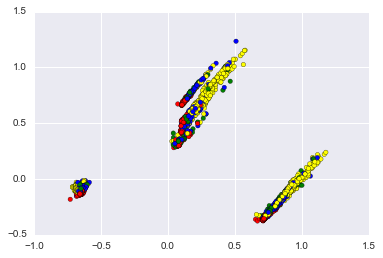

In [306]:
%pylab inline
colors = ['red', 'green', 'blue', 'yellow']
plt.scatter(data['x'], data['y'], c=[colors[p-1] for p in df['Salary Bin']])

In [318]:
n = 4
df['Salary Bin'] = pd.qcut(df['Adjusted Salary'], n, labels=list([x + 1 for x in range(n)]))

from sklearn.neighbors import KNeighborsClassifier
X = np.asarray(pd.DataFrame(df, columns=columns))
y = np.asarray(df['Salary Bin'])
clf = KNeighborsClassifier()
groups = [players.index(row['Player Id']) for index, row in df.iterrows()]
scores = cross_val_score(clf, X, y, groups, cv=GroupKFold(n_splits=5))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.63 (+/- 0.04)


In [314]:
list([x + 1 for x in range(5)])

[1, 2, 3, 4, 5]

## Experiment with different SVM kernels

In [340]:
clf = svm.SVC(kernel='rbf')
scores = cross_val_score(clf, X, y, groups, cv=GroupKFold(n_splits=5))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.59 (+/- 0.03)
